In [29]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn
import sklearn.cluster         
import sklearn.mixture         
import sklearn.preprocessing   
import mpl_toolkits.mplot3d    

(100, 100, 3)
[0.30588236 0.5568628  0.2       ]


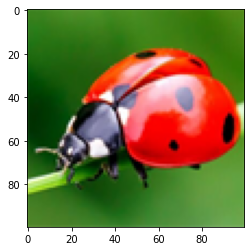

In [30]:
image = plt.imread('ladybug.png')
print(image.shape)
plt.imshow(image)
print(image[0,0])

In [31]:
RGB = image.reshape(-1, 3)
print(RGB.shape)
print(RGB)

(10000, 3)
[[0.30588236 0.5568628  0.2       ]
 [0.27058825 0.53333336 0.16470589]
 [0.27058825 0.53333336 0.16470589]
 ...
 [0.4509804  0.6745098  0.34901962]
 [0.4392157  0.6784314  0.34509805]
 [0.46666667 0.6901961  0.37254903]]


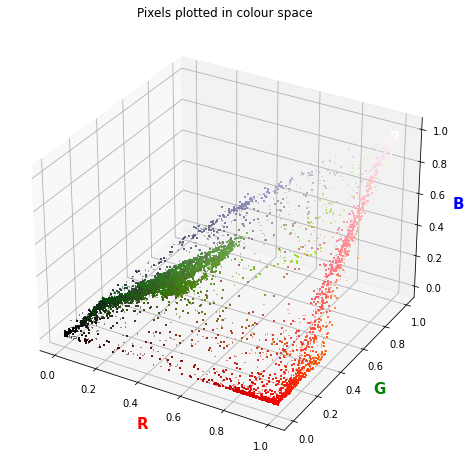

In [32]:
def plot_colour_space(RGB, title=None, hold=False, **kwargs):
    """
    Plots Nx3 matrix RGB in 3 dimensions.
    
    The keyword arguments are passed to Matplotlib's scatter() function.
    If hold=True, the points will be added to the previous plot. Otherwise a new plot is generated.
    """
    if hold:
        ax = plt.gca()
    else:
        fig = plt.figure(figsize=(8,8))
        ax = fig.add_subplot(111, projection='3d')
    kwargs.setdefault('alpha', 1.0)
    ax.scatter(*RGB.T, **kwargs)
    ax.set_xlabel('R', color='r', fontweight='bold', fontsize=15)
    ax.set_ylabel('G', color='g', fontweight='bold', fontsize=15)
    ax.set_zlabel('B', color='b', fontweight='bold', fontsize=15)
    if title is not None:
        ax.set_title(title)
    
plot_colour_space(RGB, c=RGB, s=0.5, marker='s', title="Pixels plotted in colour space")

In [61]:
def run_kmeans(data, k):
    """
    Runs K-means on an NxD array using k clusters.    
    Returns a KxD matrix of centroids and a length-N vector of labels (cluster assignments).
    """
    kmeans = sklearn.cluster.KMeans(n_clusters=k, random_state=0).fit(data)
    return kmeans.cluster_centers_, kmeans.labels_

centroids, labels = run_kmeans(RGB, k=5)

print(centroids)
print(labels, len(labels))


[[0.9183012  0.1195145  0.04882477]
 [0.2199343  0.46929756 0.0934843 ]
 [0.88890684 0.6727402  0.68114316]
 [0.07332233 0.23711279 0.04663825]
 [0.39092913 0.5740272  0.28999868]]
[4 1 1 ... 4 4 4] 10000


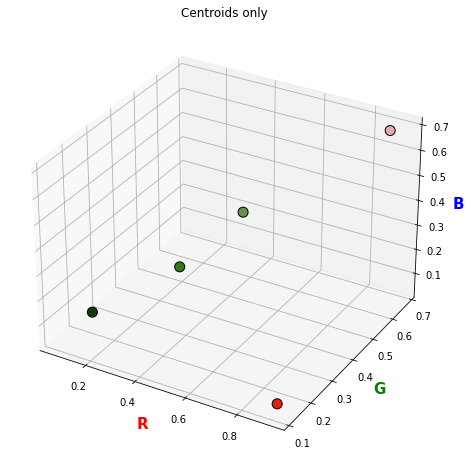

In [36]:
plot_colour_space(centroids, facecolors=centroids, edgecolor='black', s=100, title="Centroids only")

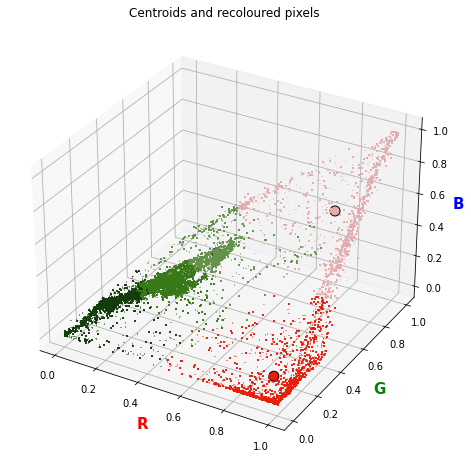

In [64]:
RGB_recoloured = centroids[labels]
plot_colour_space(RGB, c=RGB_recoloured, marker='s', s=0.5, title="Centroids and recoloured pixels")
plot_colour_space(centroids, facecolors=centroids, edgecolor='black', s=100, hold=True)

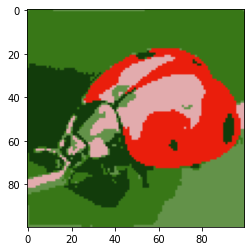

In [44]:
plt.imshow(RGB_recoloured.reshape(image.shape));

In [67]:
h, w, _ = image.shape                                
X, Y = np.meshgrid(np.arange(w), np.arange(h))       
RGBXY = np.column_stack([RGB, X.ravel(), Y.ravel()]) 
print(RGBXY)

[[ 0.30588236  0.55686277  0.2         0.          0.        ]
 [ 0.27058825  0.53333336  0.16470589  1.          0.        ]
 [ 0.27058825  0.53333336  0.16470589  2.          0.        ]
 ...
 [ 0.4509804   0.67450982  0.34901962 97.         99.        ]
 [ 0.43921569  0.67843139  0.34509805 98.         99.        ]
 [ 0.46666667  0.6901961   0.37254903 99.         99.        ]]


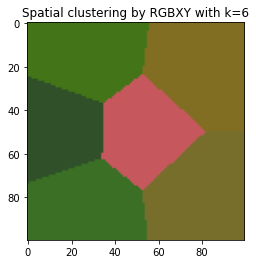

In [68]:
centroids, labels = run_kmeans(RGBXY, k=6)
RGB_recoloured = centroids[labels,:3]
plt.imshow(RGB_recoloured.reshape(image.shape))
plt.title('Spatial clustering by RGBXY with k=6');

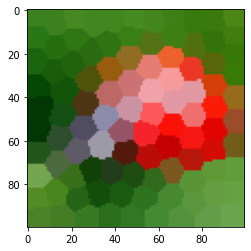

In [71]:
centroids, labels = run_kmeans(RGBXY, k=100)
RGB_recoloured = centroids[labels,:3]
plt.imshow(RGB_recoloured.reshape(image.shape));

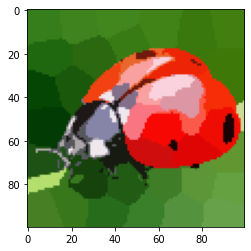

In [78]:
RGBXY_scaled = RGBXY*np.array([1, 1, 1, 0.02, 0.02])
centroids, labels = run_kmeans(RGBXY_scaled, k=50)
RGB_recoloured = centroids[labels,:3]
plt.imshow(RGB_recoloured.reshape(image.shape));